In [ ]:
!pip install spacy -U
!python -m spacy download pl_core_news_sm
!pip install rich

import spacy as sp
from rich import inspect

     |████████████████████████████████| 6.0 MB 7.0 MB/s 
     |████████████████████████████████| 451 kB 51.3 MB/s 
     |████████████████████████████████| 181 kB 26.9 MB/s 
     |████████████████████████████████| 628 kB 54.6 MB/s 
     |████████████████████████████████| 10.1 MB 23.1 MB/s 
     |████████████████████████████████| 42 kB 2.0 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 58.6 M

In [56]:
import pandas as pd
import numpy as np
import regex as re
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [63]:
dane = "tweety_csv"
df_tweet = pd.read_csv(dane)

print(df_tweet.info())
print(df_tweet["text"].head(100))
df_tweet = df_tweet.drop_duplicates(keep='first')
#CZ.1
  #zad 1
df_tweet["created_at"] = [w.replace("Fri","Piatek") for w in df_tweet["created_at"]]
df_tweet["created_at"] = [w.replace("Sat","Sobota") for w in df_tweet["created_at"]]
df_tweet["created_at"] = [w.replace("Sun","Niedziela") for w in df_tweet["created_at"]]
df_tweet["created_at"] = [w.replace("Mon","Poniedzialek") for w in df_tweet["created_at"]]
df_tweet["created_at"] = [w.replace("Tue","Wtorek") for w in df_tweet["created_at"]]
df_tweet["created_at"] = [w.replace("Wed","Sroda") for w in df_tweet["created_at"]]
df_tweet["created_at"] = [w.replace("Thu","Czwartek") for w in df_tweet["created_at"]]
  #zad 2 
df_tweet["user_created_at"] = [w.replace("Jan","01") for w in df_tweet["user_created_at"]]
df_tweet["user_created_at"] = [w.replace("Feb","02") for w in df_tweet["user_created_at"]]
df_tweet["user_created_at"] = [w.replace("Mar","03") for w in df_tweet["user_created_at"]]
df_tweet["user_created_at"] = [w.replace("Apr","04") for w in df_tweet["user_created_at"]]
df_tweet["user_created_at"] = [w.replace("May","05") for w in df_tweet["user_created_at"]]
df_tweet["user_created_at"] = [w.replace("Jun","06") for w in df_tweet["user_created_at"]]
df_tweet["user_created_at"] = [w.replace("Jul","07") for w in df_tweet["user_created_at"]]
df_tweet["user_created_at"] = [w.replace("Aug","08") for w in df_tweet["user_created_at"]]
df_tweet["user_created_at"] = [w.replace("Sep","09") for w in df_tweet["user_created_at"]]
df_tweet["user_created_at"] = [w.replace("Oct","10") for w in df_tweet["user_created_at"]]
df_tweet["user_created_at"] = [w.replace("Nov","11") for w in df_tweet["user_created_at"]]
df_tweet["user_created_at"] = [w.replace("Dec","12") for w in df_tweet["user_created_at"]]

print(df_tweet["text"].head(100))

  #zad3
lista_url_tweetow = df_tweet["tweet_url"].to_list()
  #zad4
lista_url = df_tweet["urls"].to_list()
  #zad5
lista_obrazow = df_tweet["media"].to_list()





##print(df_tweet["user_created_at"][600])
#print(lista_url_tweetow)
#print(lista_url)
#print(lista_obrazow)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 1 non-null      object 
 1   created_at                  2432 non-null   object 
 2   hashtags                    124 non-null    object 
 3   media                       195 non-null    object 
 4   urls                        276 non-null    object 
 5   favorite_count              2432 non-null   int64  
 6   id                          2432 non-null   int64  
 7   in_reply_to_screen_name     848 non-null    object 
 8   in_reply_to_status_id       847 non-null    float64
 9   in_reply_to_user_id         848 non-null    float64
 10  lang                        2432 non-null   object 
 11  place                       13 non-null     object 
 12  possibly_sensitive          445 non-null    object 
 13  quote_id                    152 n

In [ ]:
#CZ1 zad6
nlp = sp.load("pl_core_news_sm")
def filtruj(tekst, nlp):
  doc = nlp(tekst)
  clean = []
  for elm in doc:
    if elm.is_stop == True:
      pass
    else:
      clean.append(elm)

  return clean 

df_tweet['text_stop'] = [ filtruj(w, nlp) for w in df_tweet['text']]



 14  retweet_count
  favorite_count              2432 non-null 

In [ ]:
print(df_tweet['text_stop'].head())

0    [123, lata, zaborów, ,, 6, lat, okupacji, ,, \...
1                         [@DarkKnight1386, szkoła, 😕]
2    [brakuje, dwóch, ocen, paska, jebac, zrobie, s...
3             [szkoła, zło, najgorsze, gówno, istnieć]
4    [@breakupnasty, chodze, prywatnej, prawda, wrz...
Name: text_stop, dtype: object


In [65]:
#CZ2 
#zad1 
print(df_tweet.nlargest(5,'retweet_count')['text'])
#zad2
print(df_tweet.nlargest(5,'favorite_count')['text'])
#zad3
print(df_tweet[df_tweet['possibly_sensitive'] == False]["text"].drop_duplicates(keep='first'))







1125    ŚNIADANIA PRZED SZKOŁĄ A THREAD 🥞 https://t.co...
0       123 lata zaborów, 6 lat okupacji,\n44 lata kom...
5       123 lata zaborów, 6 lat okupacji,\n44 lata kom...
13      123 lata zaborów, 6 lat okupacji,\n44 lata kom...
16      123 lata zaborów, 6 lat okupacji,\n44 lata kom...
Name: text, dtype: object
536     123 lata zaborów, 6 lat okupacji,\n44 lata kom...
738     Gdybyście chcieli wiedzieć to: Szkoła nie może...
645     🎬Zostało 7 dni do premiery 4 sezonu serialu Sz...
1853    Szkoła tak bardzo nieprzystosowała mnie do życ...
1510    Kiedys PIS mówił, że o wychowaniu dzieci powin...
Name: text, dtype: object
6       Łódź: szkoła od afery z "zakazem błyskawic" ma...
12      🎬Zostało 7 dni do premiery 4 sezonu serialu Sz...
30      🏫 Jedną z pierwszych jednostek kształtujących ...
34      Osiągnęliśmy szczyty politycznej hucpy. Chwalą...
39      Meksyk – Salezjańska #Szkoła w #Ameryce: XXIII...
                              ...                        
2389    moze i umre 

In [38]:
print(df_tweet['user_created_at'].head())

def pozData(userID):
  b = df_tweet[df_tweet['user_id']== userID]['user_created_at']

  return b

#zad4
def nStrUz(set):
  min = 2022 
  actID = 0

  
  for elem in set['user_created_at']:
    if int(re.findall('\s\d{4}', elem)[0]) < min:
      min = int(re.findall('\s\d{4}', elem)[0])
      actID = df_tweet[df_tweet['user_created_at']==elem]['user_id']

## W teorii ten fragment powinien porównywac daty co do daia, ale z jakiegoś powodu nie chce porównywac takich samych daych, bo twierdzi, że to inne dane
   # elif int(re.findall('\s\d{4}', elem)[0]) == min:
   
   #   if df_tweet[df_tweet['user_created_at']==elem]['user_id'] == actID:
    #    pass
     # elif int(re.findall('\s\d{2}\s', elem)[0]) < int(re.findall('\s\d{2}\s',pozData(actID))[0]):
     #   actID = df_tweet[df_tweet['user_created_at']==elem]['user_id']
      #elif int(re.findall('\s\d{2}\s', elem)[0]) == int(re.findall('\s\d{2}\s',pozData(actID))[0]):
       # if int(re.findall('\s\d{2}\s\K\s\d{2}\s', elem)[0]) < int(re.findall('\s\d{2}\s\K\s\d{2}\s',df_tweet[df_tweet['user_id']== actID]['user_created_at'])[0]):
        #  actID = df_tweet[df_tweet['user_created_at']==elem]['user_id']
      #else:
       # pass
    else:
      pass

  return int(actID)

b = nStrUz(df_tweet)
print(df_tweet[df_tweet['user_id']== b]['user_created_at'])
print(df_tweet[df_tweet['user_id']== b]['text'])

0    Sun 08 19 18:11:09 +0000 2018
1    Tue 04 21 22:46:03 +0000 2020
2    Sun 01 24 10:45:27 +0000 2021
3    Thu 10 22 17:50:14 +0000 2020
4    Sat 10 17 06:58:35 +0000 2020
Name: user_created_at, dtype: object
56    Mon 11 17 10:49:51 +0000 2008
Name: user_created_at, dtype: object
56    123 lata zaborów, 6 lat okupacji,\n44 lata kom...
Name: text, dtype: object


In [ ]:
#zad5
print(df_tweet.nlargest(1,'user_followers_count')['text'])


1277    [Tekst PREMIUM] "Wystarczy nawet jeden nauczyc...
Name: text, dtype: object
1277    1533987
Name: user_followers_count, dtype: int64


In [ ]:
#zad6 
print(df_tweet[df_tweet['user_verified']==True]['user_name'].drop_duplicates(keep='first'))

185                                   Beata Biel
346                      Legia Soccer Schools ⚽️
396                           Katarzyna Lubnauer
565     PE Biuro w Polsce - konto ZARCHIWIZOWANE
615           21 Brygada Strzelców Podhalańskich
1033                            Jarosław Kuźniar
1081              1. Warszawska Brygada Pancerna
1094                           Tygodnik POLITYKA
1121            Ministerstwo Obrony Narodowej 🇵🇱
1223                                TVN Warszawa
1224                   18 Dywizja Zmechanizowana
1246                                   Fakty TVN
1248                          Jarek Gromadziński
1274                                Radio Maryja
1277                                       tvn24
1372                                Radio TOK FM
1422           Ministerstwo Klimatu i Środowiska
1487                                 Dziennik.pl
1534                          Przemysław Czarnek
1616                              Rzeczpospolita
1935                

In [50]:
#zad7
def nDni(set):
  value = [0,0,0,0,0,0,0]

  df_tweet_created = list(set['created_at'].copy())
  

  while len(df_tweet_created) != 0:
    for elem in set['created_at']:
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Poniedzialek':
        value[0] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Wtorek':
        value[1] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Sroda':
        value[2] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Czwartek':
        value[3] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Piatek':
        value[4] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Sobota':
        value[5] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Niedziela':
        value[6] += 1
        df_tweet_created.remove(elem)

  c = value.index(max(value))

  moj_slownik = {'0': 'Poniedzialek', '1': 'Wtorek','2': 'Sroda', '3': 'Czwartek','4': 'Piatek', '5': 'Sobota','6': 'Niedziela'}

  return moj_slownik[str(c)]

print(nDni(df_tweet))


Czwartek


In [61]:
#CZ.3
#zad1, 2, 3
nlp = sp.load("pl_core_news_sm")

def columRegex(tekst, nlp, strLabel):
  doc = nlp(tekst)
  clean = []
  for ent in doc.ents:
    if ent.label_ == strLabel:
       clean.append(ent)
      
    else:
      pass

  return clean 

df_tweet['Persons'] = [columRegex(w, nlp, 'persName') for w  in df_tweet['text']]
df_tweet['Places'] = [columRegex(w, nlp, 'placeName') for w  in df_tweet['text']]
df_tweet['Organizations'] = [columRegex(w, nlp, 'orgName') for w  in df_tweet['text']]

KeyboardInterrupt: ignored

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


KeyboardInterrupt: ignored

In [19]:
print(df_tweet['Persons'].head(10))
print(df_tweet['Places'].head(10))
print(df_tweet['Organizations'].head(10))

0                                                   []
1                                                   []
2                                                   []
3                                                   []
4                                                   []
5                                                   []
6                                                   []
7                                                   []
8                                                   []
9    [(dyrekcją, szkoły), (Przemysławem, Szczepłock...
Name: Persons, dtype: object
0                          [(Polsce)]
1                                  []
2                                  []
3                                  []
4    [(angielskiego), (niemieckiego)]
5                          [(Polsce)]
6                            [(Łódź)]
7                                  []
8                          [(Polsce)]
9                         [(Toruniu)]
Name: Places, dtype: object
0            

In [23]:
#zad4
mnlp = sp.blank("pl")
ruler = mnlp.add_pipe("entity_ruler")
pattern = "\S+"
patterns = [{"label": "Hashtags", "pattern": [{"ORTH": "#"}, {"TEXT": {"REGEX": pattern}}]}]
ruler.add_patterns(patterns)

exmpl = "To wszytko jest tylko snem #iluzja #frajer"
doc = mnlp("To wszytko jest tylko snem #iluzja #frajer")
for ent in doc.ents:
  print(ent.text, ent.label_)

def columRegex(tekst, nlp, strLabel):
  doc = nlp(tekst)
  clean = []
  for ent in doc.ents:
    if ent.label_ == strLabel:
       clean.append(ent)
      
    else:
      pass

  return clean 

df_tweet['Hashtags'] = [columRegex(w, mnlp,'Hashtags') for w  in df_tweet['text']]
print(df_tweet['Hashtags'].head(20))

#iluzja Hashtags
#frajer Hashtags
0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                                                    []
5                                                    []
6                                                    []
7                                                    []
8                                                    []
9                                 [(#, DyplomRówności)]
10                                                   []
11                                                   []
12                                                   []
13                                                   []
14    [(#, EdukacjaSeksualna), (#, WDŻ), (#, Czarnek...
15                                                   []
16                                                   []
17            

<BarContainer object of 7 artists>

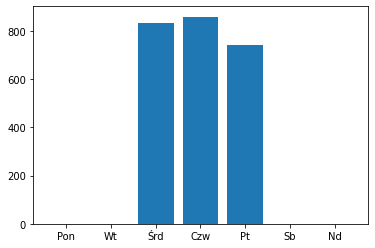

In [57]:
#CZ4 zad1
def wykres(set):
  value = [0,0,0,0,0,0,0]

  df_tweet_created = list(set['created_at'].copy())
  

  while len(df_tweet_created) != 0:
    for elem in set['created_at']:
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Poniedzialek':
        value[0] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Wtorek':
        value[1] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Sroda':
        value[2] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Czwartek':
        value[3] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Piatek':
        value[4] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Sobota':
        value[5] += 1
        df_tweet_created.remove(elem)
      if re.findall('[A-Z]{1}[a-z]{4,}', elem)[0] == 'Niedziela':
        value[6] += 1
        df_tweet_created.remove(elem)

    Liczba_Tweetów = value
    Dni = ['Pon','Wt','Śrd','Czw','Pt','Sb','Nd']

    

    return plt.bar(Dni, Liczba_Tweetów)

wykres(df_tweet)